# Interacting with CLIP

This is a self-contained notebook that shows how to download and run CLIP models, calculate the similarity between arbitrary image and text inputs, and perform zero-shot image classifications.

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import IPython.display
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import torch
import os
import faiss
import requests
from io import BytesIO

/tmp/ipykernel_6735/3452909246.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'transformers'

# Load the pretrained CLIP model

In [14]:
# Set the device
device = "cpu"
# Define the model ID
model_ID = "openai/clip-vit-base-patch32"
# Save the model to device
model = CLIPModel.from_pretrained(model_ID).to(device)
# Get the processor
processor = CLIPProcessor.from_pretrained(model_ID)
# Get the tokenizer
tokenizer = CLIPTokenizer.from_pretrained(model_ID)

# Load data

In this assignment, we will use a subset of the conceptual captions dataset consists of around 3.3M pairs of images and caption. You can find the whole dataset here: https://huggingface.co/datasets/conceptual_captions 

In [2]:
image_data_df = pd.read_csv("/Users/visionwang/Documents/courses/Spring-2024/Lecture/cleaned-data/image_data_df.csv")
image_data_df

,image_url,caption,is_valid
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,True
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,True
2,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,True
3,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,True
4,https://prismpub.com/wp-content/uploads/2016/1...,the jetty : different types of plants to estab...,True
...,...,...,...
144,https://i.pinimg.com/736x/f2/f6/91/f2f6917f084...,image detail for - fashion,True
145,http://www.bigmapblog.com/maps/map03/dd/VWRSnl...,"map showing routes of principal explorers , fr...",True
146,https://thumb9.shutterstock.com/display_pic_wi...,foal in front of a white background,True
147,https://thumb1.shutterstock.com/display_pic_wi...,large set of plastic bottles isolated on black...,True


# Create text and image embeddings

In [15]:
def single_text_embedding(text):
    ### Hint ###
    # function input: text string
    # function output: numpy array of the text embedding
    
    # generate tokenize text
    inputs = ...
    # generate text embedding using CLIP
    text_embedding = ...
    # convert the embeddings to numpy array
    embedding_as_np = ...
    return embedding_as_np

def single_image_embedding(input_image):
    ### Hint ###
    # function input: image object
    # function output: numpy array of the image embedding

    # Apply CLIP processor to image
    image = ...
    # generate image embedding using CLIP
    image_embedding = ...
    # convert the embeddings to numpy array
    embedding_as_np = ...
    return embedding_as_np

In [22]:
text_embs = []
img_embs = []

for image_url, caption in zip(image_data_df["image_url"], image_data_df["caption"]):
    text_embs.append(single_text_embedding(caption))
    ### Hint ###
    # You need to use requests.get function to get image response from its url 
    # And then apply BytesIO(response.content) to get image object
    response = ...
    image = ...
    img_embs.append(single_image_embedding(image))

text_embs_np = np.vstack(text_embs)
img_embs_np = np.vstack(img_embs)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


__Question 1:__ Please use the whole image embeddings generated from CLIP model to do a text-image search task. You should use two query questions to search their response images: 
* Query question 1: What is fashion this year?
* Query question 2: What is fashion this year for cat outfit?

Do you get same or different response images for both query questions? What are the reasons do you think? Please summarize your answer in words. 

# Text-image search

In [ ]:
def find_image(qr_sentence, image_data_df, img_embs_np):
    
    # generate vector for query sentence
    qr_sent_vec = single_text_embedding(qr_sentence)

    # perform vector search through similarity comparison
    n_dim = img_embs_np.shape[1]
    x = np.vstack(img_embs_np).astype(np.float32)
    q = qr_sent_vec.reshape(1, -1)
    index = faiss.index_factory(n_dim, "Flat", faiss.METRIC_INNER_PRODUCT)
    # add all images
    faiss.normalize_L2(x)
    index.add(x)
    # do vector search for the query sentence
    faiss.normalize_L2(q)
    similarity, idx = index.search(q, k=index.ntotal)
    img_idx = idx[0][0]
    # get image response using requests.get
    response = ...
    # get image through image object
    image = ...
    return image

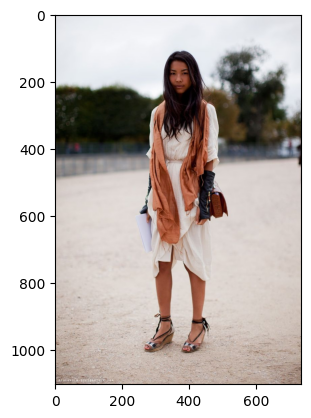

In [46]:
qr_sentence = "what is fashion this year?"
response_img = find_image(qr_sentence, image_data_df, img_embs_np)
plt.imshow(response_img)

In [ ]:
qr_sentence = "what is fashion this year for cat outfit?"
response_img = find_image(qr_sentence, image_data_df, img_embs_np)
plt.imshow(response_img)

Summarize your answer: 

__Question 2:__ Please use the whole text embeddings generated from CLIP model to do image-text search task. You are given two query images (from the Internet) to search their textual descriptions:
* Snow-Day.jpeg image
* football-player.jpeg image

# Image-text search

In [ ]:
def find_text(qr_image, image_data_df, text_embs_np):
    # function input: qr_image (query image), image_data_df, text_embs_np
    # function output: response textural description for the query image
    
    # generate vector for query image
    qr_image_vec = ,,,

    # perform vector search through similarity comparison
    # define the number of dimension
    n_dim = ...
    x = np.vstack(text_embs_np).astype(np.float32)
    q = qr_image_vec.reshape(1, -1)
    # establish FAISS index with parameters ("Flat" and METRIC_INNER_PRODUCT
    index = ...
    # add all texts
    faiss.normalize_L2(x)
    index.add(x)
    # do vector search for the query sentence
    faiss.normalize_L2(q)
    # do index search
    similarity, idx = ...
    text_idx = idx[0][0]
    
    return image_data_df["caption"][text_idx]

person is coming maps reveal the first days of snow


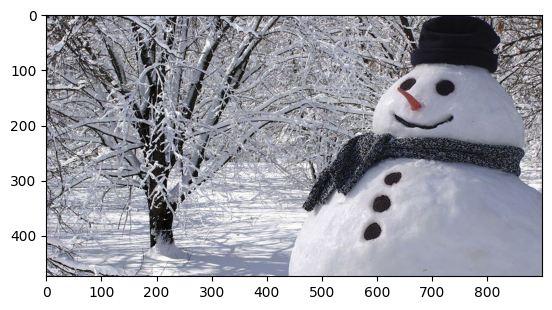

In [35]:
qr_image = Image.open("/content/sample_data/Snow-Day.jpeg").convert("RGB")
plt.imshow(qr_image)
response_text = find_text(qr_image, image_data_df, text_embs_np)
print(response_text)

soccer player , who led forward line , and person embrace as they make their way off the pitch


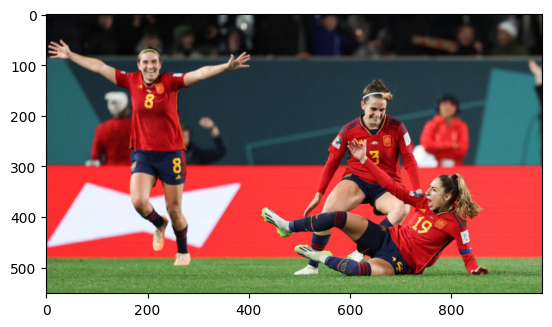

In [36]:
qr_image = Image.open("/content/sample_data/football-player.jpeg").convert("RGB")
plt.imshow(qr_image)
response_text = find_text(qr_image, image_data_df, text_embs_np)
print(response_text)

# Human feedback for next generation of model training 

Let us randomly find an image from our datasets and simply adjust the image size. And then let us use this adjusted image to do a image-text search to see if we can get its corresponding description. 

forest on a sunny day


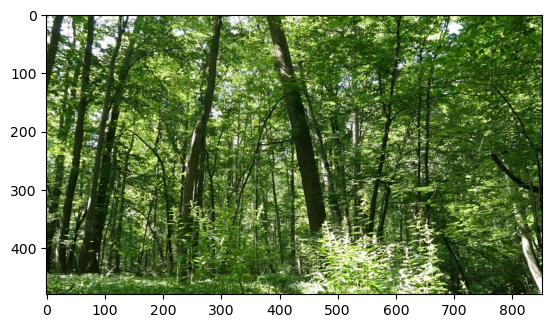

In [8]:
# Find the corresponding description for this image in dataset
print(image_data_df["caption"][80])
response = requests.get(image_data_df["image_url"][80])
image = Image.open(BytesIO(response.content)).convert("RGB")
plt.imshow(image)

tree branches swing at real time with the wind while clouds move fast in time lapse


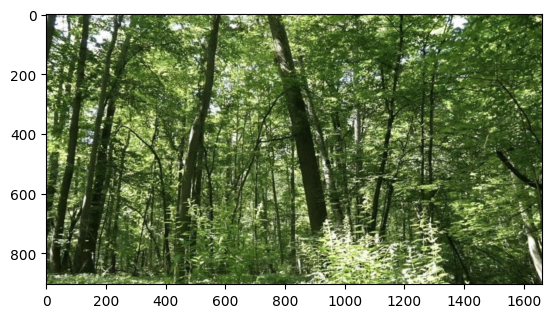

In [37]:
qr_image = Image.open("/content/sample_data/forest.png").convert("RGB")
plt.imshow(qr_image)
response_text = find_text(qr_image, image_data_df, text_embs_np)
print(response_text)

As we can see the resutls from image-text search above, we cannot get the exact description in the dataset for the image. Considering this situation happens in a real conversational agent, we can further conduct a [reinforcement learning from human feedback (RLHF)](https://en.wikipedia.org/wiki/Reinforcement_learning_from_human_feedback) process to optimize the model performance. 

__Question 3:__ Could you evaluate the text response from image-text search for __forest.png__ image? Please give your description in words for next generation of model training.